In [1]:
import pandas as pd
from torch.utils.data import DataLoader
from dataset_class import MessidorOpenCVDataset
from preprocess_class import OpenCV_DR_Preprocessor
import matplotlib.pyplot as plt
from transforms import light_transform, heavy_transform


preprocessor = OpenCV_DR_Preprocessor(apply_clahe=True)

# Create dataset
dataset = MessidorOpenCVDataset(root_dir='/Users/abohane/Desktop/THEIA Training/MESSIDOR',
                                preprocessor=preprocessor,
                                light_transform=None,
                                heavy_transform=None,
                                minority_classes=[1])

# Create dataloader
dataloader = DataLoader(dataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=4,
                        pin_memory=True)


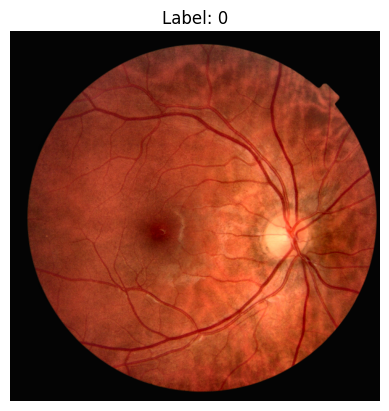

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose img_tensor is a single image from your DataLoader, shape: (3, H, W)
# And you used ImageNet normalization: mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def unnormalize(img_tensor, mean, std):
    """
    img_tensor: torch.Tensor of shape (3, H, W)
    mean, std: arrays of shape (3,)
    Returns: numpy array of shape (H, W, 3) in [0, 1]
    """
    img = img_tensor.permute(1, 2, 0).cpu().numpy()  # (H, W, 3)
    img = (img * std) + mean
    img = np.clip(img, 0, 1)
    return img

# Example usage:
img, label = dataset[0]  # or from your DataLoader
img_unnorm = unnormalize(img, mean, std)
img = img.permute(1, 2, 0).cpu().numpy()
plt.imshow(img_unnorm)
plt.title(f"Label: {label.item()}")
plt.axis('off')
plt.show()

In [3]:
# Check one batch
for images, labels in dataloader:
    print(images.shape)  # torch.Size([32, 3, 224, 224])
    print(labels.shape)  # torch.Size([32])
    break


torch.Size([32, 3, 600, 600])
torch.Size([32])


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x137dbe940>
Traceback (most recent call last):
  File "/Users/abohane/Desktop/THEIA Training/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/Users/abohane/Desktop/THEIA Training/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1582, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/co

In [5]:
# plot one image from the dataset after preprocessing
import numpy as np

def show_mask_effect(dataset, idx=0):
    """
    Plots the original image, the mask, and the masked image for a given index.
    """
    # Load original image (before preprocessing)
    img_path = dataset.data.iloc[idx]['Image name']
    folder = dataset.data.iloc[idx]['folder']
    full_path = f"{dataset.root_dir}/{folder}/{img_path}"

    # Use your preprocessor directly
    preprocessor = dataset.preprocessor
    img = preprocessor.load_image(full_path)
    mask = preprocessor.get_retina_mask(img)
    masked_img = preprocessor.apply_mask(img, mask)


    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title("Mask")
    axs[1].axis('off')

    axs[2].imshow(masked_img)
    axs[2].set_title("Masked Image")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

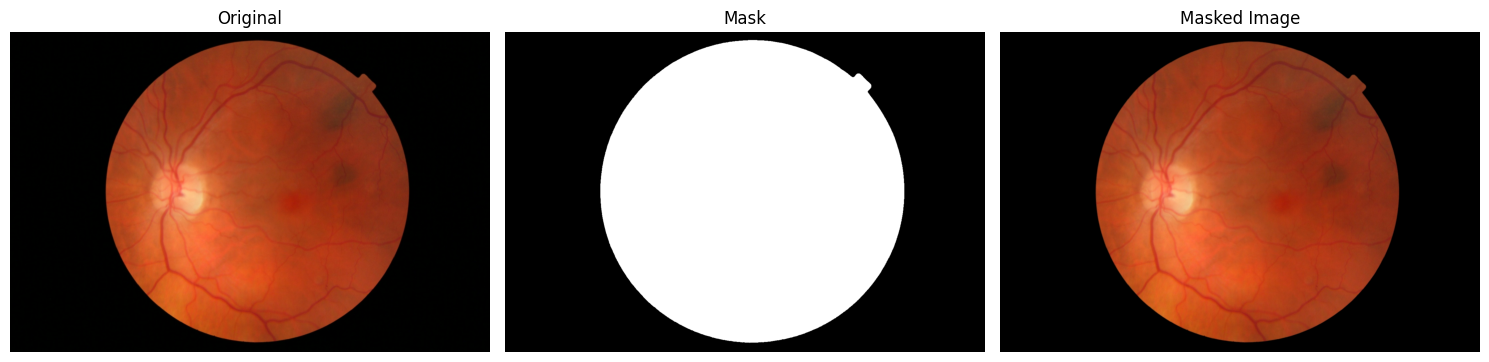

In [6]:

show_mask_effect(dataset, idx=101)


In [1]:
from dataset_class import MessidorOpenCVDataset
from preprocess_class import OpenCV_DR_Preprocessor
from transforms import light_transform, heavy_transform

preprocessor = OpenCV_DR_Preprocessor(apply_clahe=True, apply_roi_mask=True)

dataset = MessidorOpenCVDataset(
    root_dir='/Users/abohane/Desktop/THEIA Training/MESSIDOR',
    preprocessor=preprocessor,
    light_transform=light_transform,
    heavy_transform=heavy_transform,
    minority_classes=[1]
)

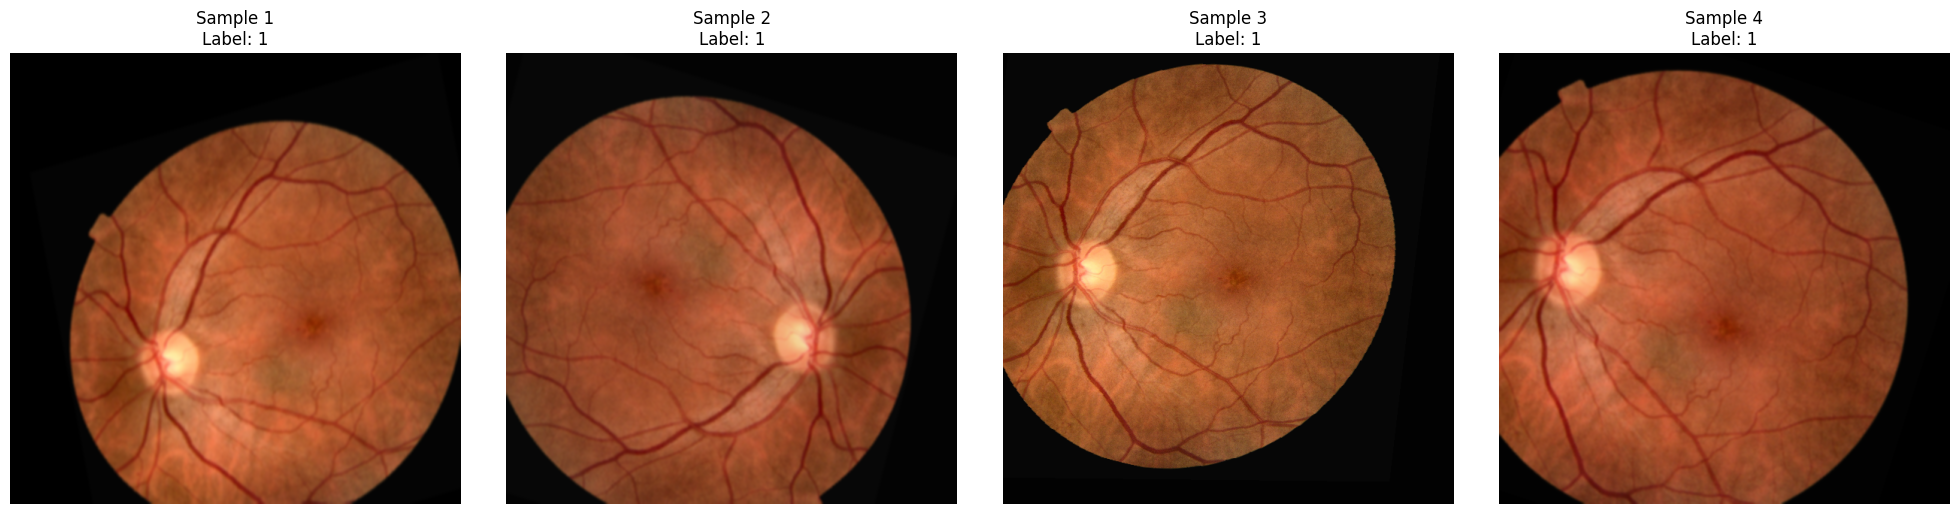

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def show_augmented_samples(dataset, idx=0, n=4):
    mean = np.array(dataset.preprocessor.mean)
    std = np.array(dataset.preprocessor.std)
    fig, axs = plt.subplots(1, n, figsize=(5*n, 5))
    for i in range(n):
        img_tensor, label = dataset[idx]
        img = img_tensor.permute(1, 2, 0).cpu().numpy()
        img = (img * std) + mean
        img = np.clip(img, 0, 1)
        axs[i].imshow(img)
        axs[i].set_title(f"Sample {i+1}\nLabel: {label.item()}")
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
show_augmented_samples(dataset, idx=32, n=4)

Current light_transform: Compose(
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.2)
)


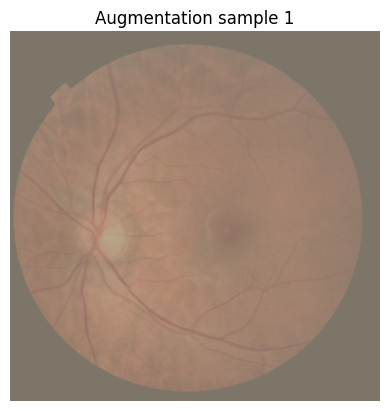

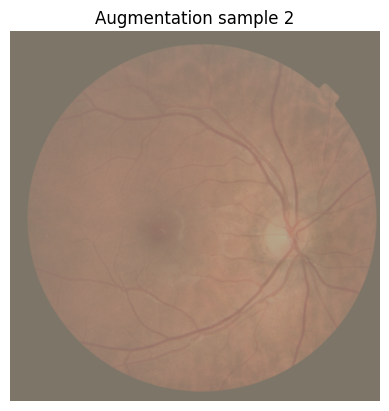

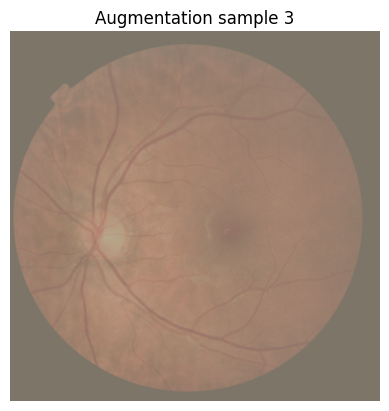

In [7]:
from transforms import light_transform
print("Current light_transform:", light_transform)

# Recreate dataset and dataloader
dataset = MessidorOpenCVDataset(
    root_dir='/Users/abohane/Desktop/THEIA Training/MESSIDOR',
    preprocessor=preprocessor,
    light_transform=light_transform,
    heavy_transform=heavy_transform,
    minority_classes=[1]
)

# Visualize several samples from the same index to check for randomness
import matplotlib.pyplot as plt
import numpy as np

for i in range(3):
    img_tensor, _ = dataset[0]
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    mean = np.array(preprocessor.mean)
    std = np.array(preprocessor.std)
    img = (img * std) + mean
    img = np.clip(img, 0, 1)
    plt.figure()
    plt.imshow(img)
    plt.title(f"Augmentation sample {i+1}")
    plt.axis('off')
    plt.show()

In [ ]:
print(dataset.data.columns)  # See column names
print(len(dataset.data))     # Number of total samples

print(dataset.data['Retinopathy grade'].value_counts())



In [ ]:
hist = dataset.data['Retinopathy grade'].value_counts().sort_index()
# print histogram
hist.plot(kind='bar')
plt.xlabel('Retinopathy Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def show_batch_images(dataloader, dataset, n_images=8):
    """
    Plots a few images from the dataloader along with their filename and label.

    Args:
        dataloader: PyTorch DataLoader
        dataset: Dataset object (to get filenames)
        n_images: How many images to show
    """
    # Get one batch
    images, labels = next(iter(dataloader))

    # Undo normalization (ImageNet stats)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Create a figure
    plt.figure(figsize=(20, 8))

    for idx in range(n_images):
        img = images[idx]

        # Unnormalize
        img = img.permute(1, 2, 0).cpu().numpy()  # (C, H, W) -> (H, W, C)
        img = (img * std) + mean  # De-normalize
        img = np.clip(img, 0, 1)

        # Find filename and label
        dataset_idx = idx  #shuffled DataLoader, this matches first batch samples
        if hasattr(dataloader.dataset, 'data'):
            info = dataset.data.iloc[dataset_idx]
            filename = info['Image name']
            grade = info['Retinopathy grade']
        else:
            filename = "Unknown"
            grade = labels[idx].item()

        # Plot
        plt.subplot(2, n_images//2, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{filename}\nGrade: {grade}", fontsize=10)

    plt.tight_layout()
    plt.show()


In [ ]:
show_batch_images(dataloader, dataset, n_images=8)
